# 5-5 Pytorch實作: 透過LSTM進行股價預測實例操作


yfinance套件安裝<br>
https://pypi.org/project/yfinance/<br>

python第三方套件yfinance上可以串接 Yahoo Finance API 下載股票的價量資訊。<br>

所以我們安裝yfinance套件來協助我們擷取股價來做後續LSTM的應用操作介紹。<br>

透過yfinance套件擷取的資料就是 Pandas 的 DataFrame, 不論是要做資料分析還是繪圖都能馬上套用。<br>



In [1]:
!pip install yfinance -q

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# 讀入series # 台灣積體電路製造
df = yf.Ticker("2330.TW")
df.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-05 00:00:00+08:00,557.389965,557.389965,552.413269,552.413269,16827391,0.000000,0.0
2023-06-06 00:00:00+08:00,551.417979,559.380693,550.422639,557.390015,20228086,0.000000,0.0
2023-06-07 00:00:00+08:00,558.385347,565.352722,557.390008,565.352722,27604813,0.000000,0.0
2023-06-08 00:00:00+08:00,559.380671,565.352707,552.413296,556.394653,23080195,0.000000,0.0
2023-06-09 00:00:00+08:00,558.385342,563.362039,558.385342,562.366699,19091713,0.000000,0.0
2023-06-12 00:00:00+08:00,571.324768,571.324768,568.338750,571.324768,26392389,0.000000,0.0
2023-06-13 00:00:00+08:00,590.236206,591.231545,586.254849,590.236206,56174363,0.000000,0.0
2023-06-14 00:00:00+08:00,587.250183,588.245522,584.264165,587.250183,23583314,0.000000,0.0
2023-06-15 00:00:00+08:00,590.000000,593.000000,587.000000,591.000000,27392154,2.749821,0.0


### 取收盤價來進行未來股價預測

In [3]:
price = df.history(period="max").Close
price

Date
2000-01-04 00:00:00+08:00     35.038960
2000-01-05 00:00:00+08:00     35.826286
2000-01-06 00:00:00+08:00     35.038960
2000-01-07 00:00:00+08:00     34.054653
2000-01-10 00:00:00+08:00     35.235744
                                ...    
2023-06-28 00:00:00+08:00    574.000000
2023-06-29 00:00:00+08:00    573.000000
2023-06-30 00:00:00+08:00    576.000000
2023-07-03 00:00:00+08:00    579.000000
2023-07-05 00:00:00+08:00    579.000000
Name: Close, Length: 5860, dtype: float64

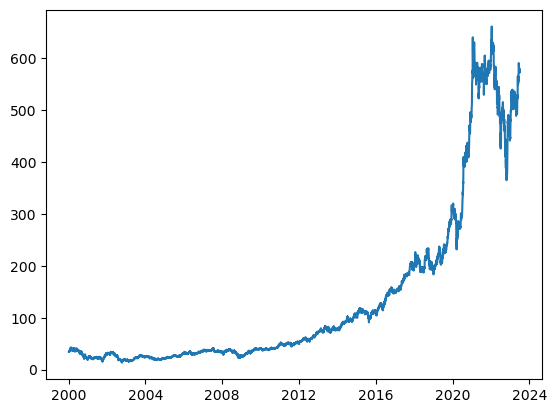

In [4]:
plt.plot(price)

In [5]:
price.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5860 entries, 2000-01-04 00:00:00+08:00 to 2023-07-05 00:00:00+08:00
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
5860 non-null   float64
dtypes: float64(1)
memory usage: 91.6 KB


## DATA PREPROCESSING
### 1. 我們先看一下股票的歷史價格有多少筆時序資料，並且進行資料正規化轉換。
我們可以觀察到抓的到的股價共有5824筆。

In [6]:
price.shape

(5860,)

訓練模型的時候我們避免單位影響訓練的成果，收盤股價我們利用```sklearn.preprocessing的MinMaxScaler```將特徵資料轉換-1~1之間。
$$
data\_std = \frac{data-min(data)}{max(data)-min(data)}
$$
$$
data\_scaled = data\_std \times (max-min) + min
$$
其中在我們的轉換，$min=-1, max=1$

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
price_ = scaler.fit_transform(price.values.reshape(-1,1))

### 2. 我們在進行建模的時候，我們希望用多少歷史資料來預測未來的資料。<br>
比如說我要預測5/17的股價，那我要參考 5/16, 5/15, 5/14,...的股價來預測。 <br>
假設我要用過去**5天**的來預測，所以我們需要把歷史資料切割來建立模型 <br>
假設我有10天的資料，$Day 1, 2,...,10$ (下圖上黑色線)<br>
我們可以把10天的資料拆成 (見下圖)<br>
$Day6  ← Day1,Day2,Day3,Day4,Day5$ → 藍色<br>
$Day7  ← Day2,Day3,Day4,Day5,Day6$ → 橘色<br>
$Day8  ← Day3,Day4,Day5,Day6,Day7$ → 綠色<br>
$Day9  ← Day4,Day5,Day6,Day7,Day8$ → 紅色<br>
$Day10 ← Day5,Day6,Day7,Day8,Day9$ → 紫色<br>

如果用5天來預測，總共有所以10天的資料，這樣會產生5筆用來訓練模型的資料。<br>
總天數假設是$N$，用$p$天來預測，一共會產生$N-p$筆資料。<br>

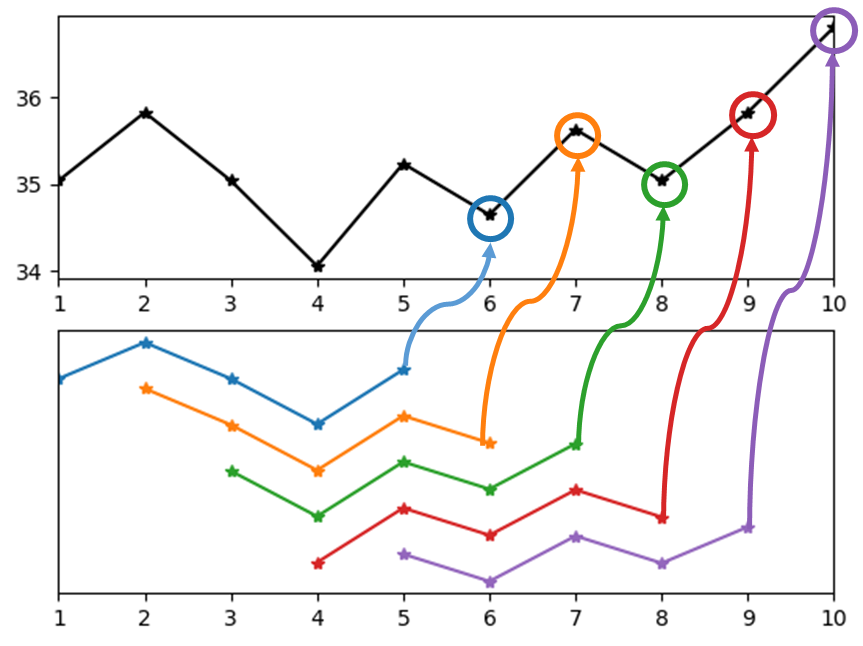

In [8]:
data_raw = np.array(price[0:10])
print(data_raw)
n_time = len(data_raw)
lookback = 5 
data = []
targets = []
for index in range(n_time - lookback): 
    data.append(data_raw[index: index + lookback])
    targets.append(data_raw[index + lookback])
print('targets:{}'.format(targets))
data

[35.0389595  35.82628632 35.0389595  34.05465317 35.23574448 34.64519501
 35.62949371 35.0389595  35.82628632 36.81058121]
targets:[34.64519500732422, 35.629493713378906, 35.03895950317383, 35.82628631591797, 36.81058120727539]


[array([35.0389595 , 35.82628632, 35.0389595 , 34.05465317, 35.23574448]),
 array([35.82628632, 35.0389595 , 34.05465317, 35.23574448, 34.64519501]),
 array([35.0389595 , 34.05465317, 35.23574448, 34.64519501, 35.62949371]),
 array([34.05465317, 35.23574448, 34.64519501, 35.62949371, 35.0389595 ]),
 array([35.23574448, 34.64519501, 35.62949371, 35.0389595 , 35.82628632])]

### 3.將進行正規化轉換的資料進行時序切割，並且將所有資料分成訓練資料和測試資料
我們利用10天資料來預測未來資料。<br>
將全部資料前半部(80%)作為訓練資料，後面(20%)作為測試資料。<br>
總共有5,827天的資料
總天數假設是$5,827$，用$20$天來預測，一共會產生$5,827-20=5,807$筆資料。<br>
前面(80%)$4,646$筆資料作為訓練資料。<br>
後面(20%)$1,161$筆資料作為測試資料。<br>
>Note: 文件撰寫為2023/5/16，節自5/16資料為5,827筆，所以同學如果在跑程式碼，資料理論上會更多筆。

In [9]:
def split_data(stock, lookback):
    data_raw = np.array(stock)
    n_time = len(data_raw)
    data, targets = [], []
    for index in range(n_time - lookback): 
        data.append(   data_raw[index: index + lookback])
        targets.append(data_raw[index + lookback])
    
    data = np.array(data)
    targets = np.array(targets)
    print('總資料量:{}'.format(data.shape))
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:]
    y_train = targets[:train_set_size]
    
    x_test = data[train_set_size:,:]
    y_test = targets[train_set_size:]
    
    return [x_train, y_train, x_test, y_test]
lookback = 10 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

總資料量:(5850, 10, 1)
x_train.shape =  (4680, 10, 1)
y_train.shape =  (4680, 1)
x_test.shape =  (1170, 10, 1)
y_test.shape =  (1170, 1)


## LSTM Model建立

我們這邊很單純的直接利用Pytorch內的```nn.LSTM```建立LSTM模型，後面在加一個fully connection層進行預測。

In [10]:
import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

# mymodel = LSTM(input_dim=1, hidden_dim=32, output_dim=1, num_layers=2)
# dummy_input = torch.randn(1, 10, 1)
# out = mymodel(dummy_input)
# torch.onnx.export(mymodel, dummy_input, "lstm_stock.onnx", opset_version=11) 

## 模型訓練

In [11]:
use_cuda=0
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 500
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

In [12]:
import time
x_train_ = torch.FloatTensor(x_train)
y_train_ = torch.FloatTensor(y_train)
x_test_ = torch.FloatTensor(x_test)
y_test_ = torch.FloatTensor(y_test)
start_time = time.time()


# datasets_train = torch.utils.data.TensorDataset(x_train_, y_train_)
# datasets_test = torch.utils.data.TensorDataset(x_test_, y_test_)
# dataloader_train = torch.utils.data.DataLoader(datasets_train, batch_size=64, shuffle=True,num_workers=0)
# dataloader_test = torch.utils.data.DataLoader(datasets_test, batch_size=64, shuffle=False,num_workers=0)
# hist = []
# for epoch in range(num_epochs):
#     model.train()
#     for batch_idx, (data, target) in enumerate(dataloader_train):
#         data=data.to(device)
#         target=target.to(device)
#         y_train_pred = model(data)
#         loss = criterion(y_train_pred, target)
#         hist.append(loss.item())
#         optimiser.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#     if epoch%10==0:
#         model.eval()
#         loss_record=0
#         for _, (data, target) in enumerate(dataloader_test):
#             data=data.to(device)
#             target=target.to(device)
#             y_pred = model(data)
#             loss = criterion(y_pred, target)
#             loss_record+=loss.item()
#         print("Epoch ", epoch, "MSE: ", loss_record/len(dataloader_test))
#     scheduler.step()
    
hist=[]    
for t in range(num_epochs):
    y_train_pred = model(x_train_)
    loss = criterion(y_train_pred, y_train_)
    hist.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%50==0:
        print("Epoch ", t, "MSE: ", loss.item())
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.5292322039604187
Epoch  50 MSE:  0.4100078046321869
Epoch  100 MSE:  0.2712842524051666
Epoch  150 MSE:  0.0855880156159401
Epoch  200 MSE:  0.014051170088350773
Epoch  250 MSE:  0.013183308765292168
Epoch  300 MSE:  0.012471596710383892
Epoch  350 MSE:  0.011675586923956871
Epoch  400 MSE:  0.010788995772600174
Epoch  450 MSE:  0.009809439070522785
Training time: 44.698092222213745


### 訓練資料的loss變化，和實際預測的變化

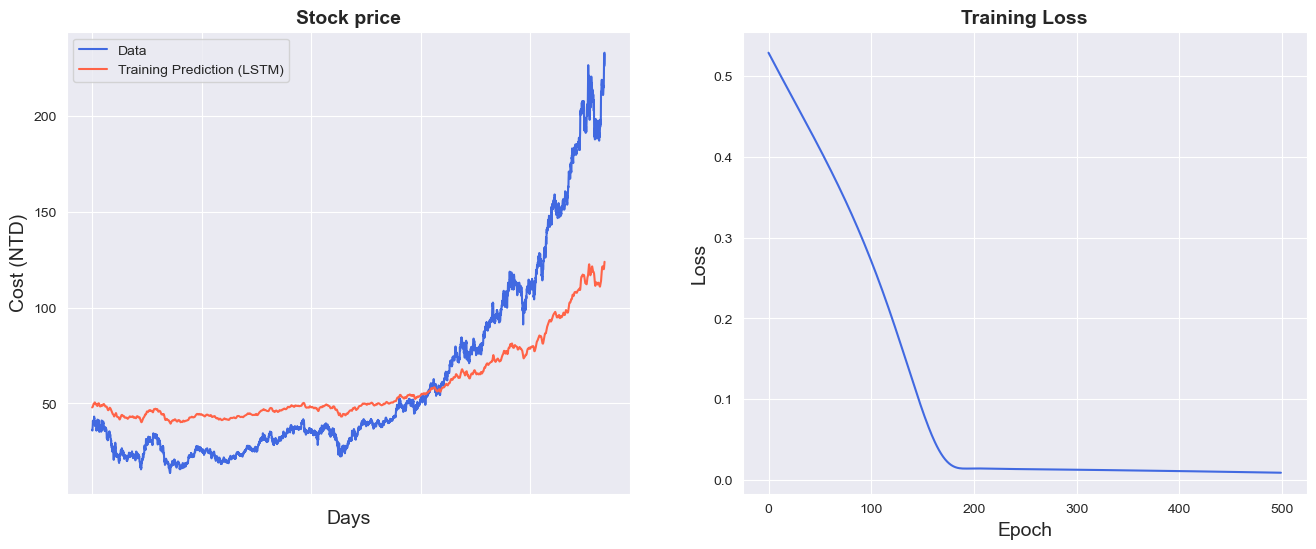

In [13]:
import seaborn as sns
sns.set_style("darkgrid")    

y_train_pred = model(x_train_)
y_train_pred = y_train_pred.detach().cpu().numpy()
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred))
original = pd.DataFrame(scaler.inverse_transform(y_train_.detach().numpy()))

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)


### 測試資料預測的結果

[Text(-200.0, 0, ''),
 Text(0.0, 0, ''),
 Text(200.0, 0, ''),
 Text(400.0, 0, ''),
 Text(600.0, 0, ''),
 Text(800.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(1200.0, 0, ''),
 Text(1400.0, 0, '')]

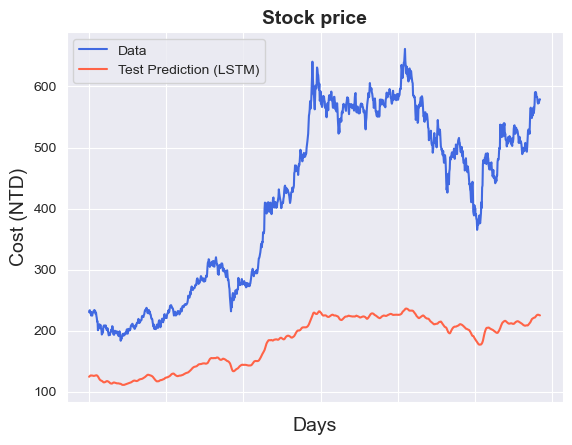

In [14]:
model.eval()
y_test_pred = model(x_test_)
predict = pd.DataFrame(scaler.inverse_transform(y_test_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_test_.detach().numpy()))
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Test Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)
ax.set_xticklabels('', size=10)


## 所有的code寫在一起，預測股價換成聯發科(2454)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import numpy as np
import time
import torch
import torch.nn as nn
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers    
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

def split_data(stock, lookback):
    data_raw = np.array(stock)
    n_time = len(data_raw)
    data, targets = [], []
    for index in range(n_time - lookback): 
        data.append(   data_raw[index: index + lookback])
        targets.append(data_raw[index + lookback])
    
    data = np.array(data)
    targets = np.array(targets)
    print('總資料量:{}'.format(data.shape))
    test_set_size = int(np.round(0.5*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:]
    y_train = targets[:train_set_size]
    
    x_test = data[train_set_size:,:]
    y_test = targets[train_set_size:]
    
    return [x_train, y_train, x_test, y_test]

# 股價換成聯發科(2454)
df = yf.Ticker("2454.TW")
price = df.history(period="max").Close
price = price[-300:-1]
scaler = MinMaxScaler(feature_range=(-1, 1))
price_ = scaler.fit_transform(price.values.reshape(-1,1))
lookback = 10 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)


input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 500

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
x_train_ = torch.FloatTensor(x_train)
y_train_ = torch.FloatTensor(y_train)
x_test_ = torch.FloatTensor(x_test)
y_test_ = torch.FloatTensor(y_test)

hist = np.zeros(num_epochs)
start_time = time.time()
model.train()
for t in range(num_epochs):
    y_train_pred = model(x_train_)
    loss = criterion(y_train_pred, y_train_)
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    if t%50==0:
        print("Epoch ", t, "MSE: ", loss.item())
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

總資料量:(289, 10, 1)
x_train.shape =  (145, 10, 1)
y_train.shape =  (145, 1)
x_test.shape =  (144, 10, 1)
y_test.shape =  (144, 1)
Epoch  0 MSE:  0.32461708784103394
Epoch  50 MSE:  0.07704554498195648
Epoch  100 MSE:  0.045070674270391464
Epoch  150 MSE:  0.021120769903063774
Epoch  200 MSE:  0.017679626122117043
Epoch  250 MSE:  0.015934107825160027
Epoch  300 MSE:  0.014355769380927086
Epoch  350 MSE:  0.013046136125922203
Epoch  400 MSE:  0.012032153084874153
Epoch  450 MSE:  0.010889573954045773
Training time: 3.4662022590637207


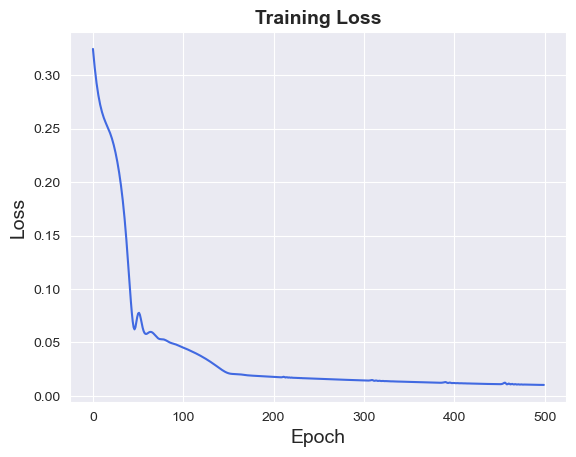

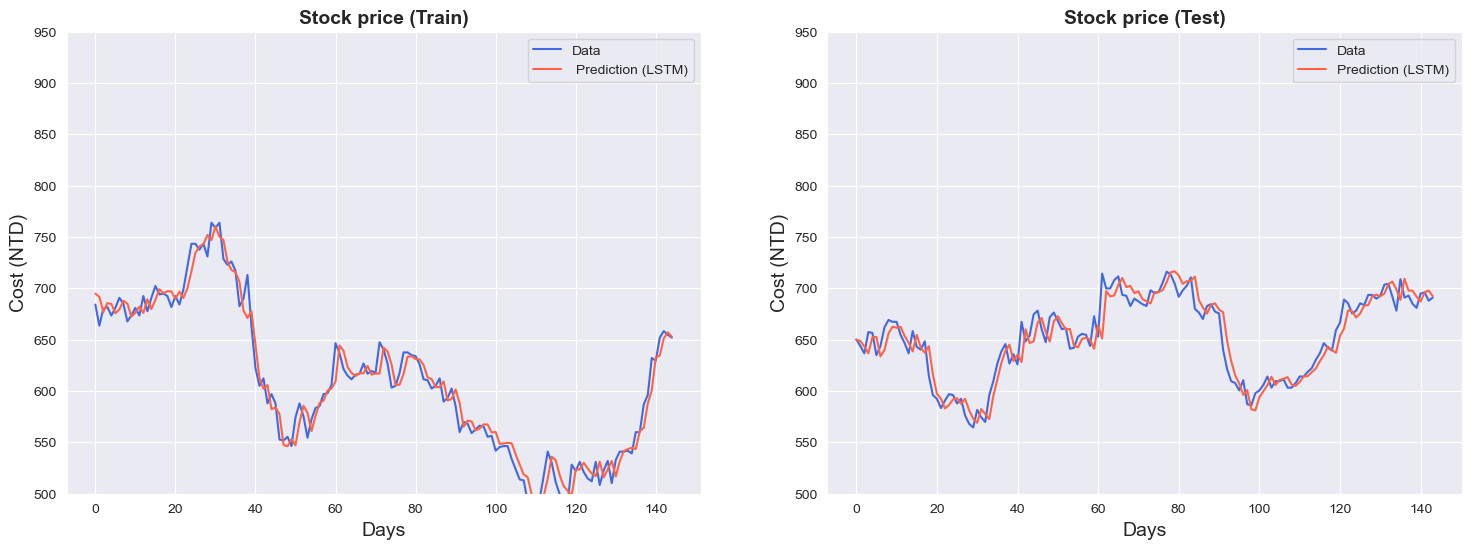

In [16]:
import seaborn as sns

sns.set_style("darkgrid")    
fig = plt.figure()
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
model.eval()
y_train_pred = model(x_train_)
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_.detach().numpy()))
plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label=" Prediction (LSTM)", color='tomato')
ax.set_title('Stock price (Train)', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)
plt.ylim([500,950])
# ax.set_xticklabels('', size=10)

y_test_pred = model(x_test_)
predict = pd.DataFrame(scaler.inverse_transform(y_test_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_test_.detach().numpy()))
plt.subplot(1, 2, 2)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Prediction (LSTM)", color='tomato')
ax.set_title('Stock price (Test)', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)
plt.ylim([500,950])

# ax.set_xticklabels('', size=10)
fig.set_figheight(6)
fig.set_figwidth(18)

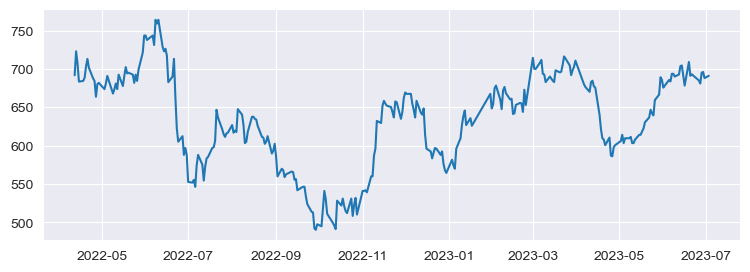

In [17]:
fig = plt.figure()
plt.plot(price)
fig.set_figheight(3)
fig.set_figwidth(9)

In [18]:
price[-15:-1]

Date
2023-06-09 00:00:00+08:00    690.026672
2023-06-12 00:00:00+08:00    692.736206
2023-06-13 00:00:00+08:00    703.574341
2023-06-14 00:00:00+08:00    704.477539
2023-06-15 00:00:00+08:00    691.833069
2023-06-16 00:00:00+08:00    678.285400
2023-06-19 00:00:00+08:00    708.993408
2023-06-20 00:00:00+08:00    691.000000
2023-06-21 00:00:00+08:00    693.000000
2023-06-26 00:00:00+08:00    685.000000
2023-06-27 00:00:00+08:00    681.000000
2023-06-28 00:00:00+08:00    695.000000
2023-06-29 00:00:00+08:00    696.000000
2023-06-30 00:00:00+08:00    688.000000
Name: Close, dtype: float64

In [19]:
## 4/25-5/9 預測 5/10
price_manual = np.array([[650,649,662,665,671,680,668,675,675,677]])
price_manual_ = scaler.transform(price_manual.reshape(-1,1))
price_manual_ = torch.FloatTensor(price_manual_)
price_manual_ = price_manual_.unsqueeze(0)
y_test_pred = model(price_manual_)
predict = scaler.inverse_transform(y_test_pred.detach().numpy())
print(predict)

[[675.43475]]


In [20]:
## 4/26-5/10 預測 5/11
price_manual = np.array([[649,662,665,671,680,668,675,675,677,668]])
price_manual_ = scaler.transform(price_manual.reshape(-1,1))
price_manual_ = torch.FloatTensor(price_manual_)
price_manual_ = price_manual_.unsqueeze(0)
y_test_pred = model(price_manual_)
predict = scaler.inverse_transform(y_test_pred.detach().numpy())
print(predict)

[[669.30286]]


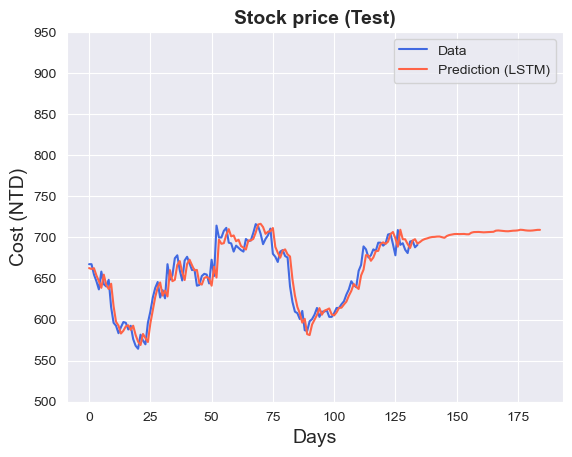

In [21]:
x=price[-145:]
real_targets=[]
predicts=[]
for i in range(135):
    price_manual = np.array(x[i:i+10]) 
    real_targets.append(np.array(x[i+10]))
    price_manual_ = scaler.transform(price_manual.reshape(-1,1))
    price_manual_ = torch.FloatTensor(price_manual_)
    price_manual_ = price_manual_.unsqueeze(0)
    y_test_pred = model(price_manual_)
    predict = scaler.inverse_transform(y_test_pred.detach().numpy())
    predicts.append(predict[0,:])
    
st = 135
for t in range(50):
    price_manual=[]
    c=0
    for j in range(10):
        try: 
            price_manual.append(x[st+j])
        except:
            price_manual.append(predicts[-1-c][0])
            c+=1
    st+=1
    price_manual = np.array(price_manual) 
    price_manual_ = scaler.transform(price_manual.reshape(-1,1))
    price_manual_ = torch.FloatTensor(price_manual_)
    price_manual_ = price_manual_.unsqueeze(0)
    y_test_pred = model(price_manual_)
    predict = scaler.inverse_transform(y_test_pred.detach().numpy())
    predicts.append(predict[0,:])
    

predict = pd.DataFrame(predicts)
original = pd.DataFrame(real_targets)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Prediction (LSTM)", color='tomato')
ax.set_title('Stock price (Test)', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)
plt.ylim([500,950])

fig.set_figheight(6)
fig.set_figwidth(18)
